In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pykalman import KalmanFilter

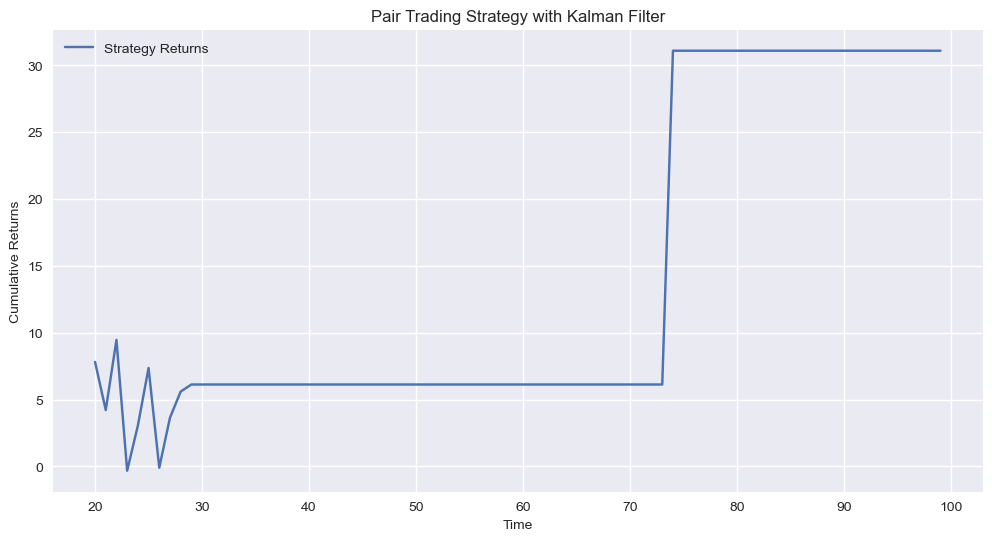

In [78]:


# Simulating some sample price data for two securities
np.random.seed(42)
num_periods = 100
noise = np.random.normal(0, 1, num_periods)
price_stock1 = np.cumsum(noise)
price_stock2 = 2 * np.cumsum(noise) + np.random.normal(0, 2, num_periods)

# Combine prices into a DataFrame
data = pd.DataFrame({'Stock1': price_stock1, 'Stock2': price_stock2})

# Implementing Kalman Filter for the pair of stocks
delta = 1e-4
trans_cov = delta / (1 - delta) * np.eye(2)
obs_mat = np.vstack([data.Stock1, np.ones(data.Stock1.shape)]).T[:, np.newaxis]
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=.0001)

state_means, _ = kf.filter(data['Stock2'].values)

data['Hedge_Ratio'] = -state_means[:, 0]

# Simple pairs trading strategy
data['Spread'] = data['Stock2'] - data['Hedge_Ratio'] * data['Stock1']
data['Spread_Mean'] = data['Spread'].rolling(
    window=20).mean()  # Rolling mean of spread
data['Spread_STD'] = data['Spread'].rolling(
    window=20).std()    # Rolling standard deviation of spread

data['Z_Score'] = (data['Spread'] - data['Spread_Mean']) / data['Spread_STD']

data['Long_Entry'] = data['Z_Score'] < -1.0
data['Long_Exit'] = data['Z_Score'] > -0.5

# Backtest
data['Position'] = np.nan
data.loc[data['Long_Entry'], 'Position'] = 1
data.loc[data['Long_Exit'], 'Position'] = 0
data['Position'] = data['Position'].fillna(method='ffill')

data['Returns'] = data['Position'].shift(
    1) * (data['Spread'] - data['Spread'].shift(1))

# Calculate cumulative returns
data['Cumulative_Returns'] = data['Returns'].cumsum()

# Plotting

plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Returns'], label='Strategy Returns')
plt.title('Pair Trading Strategy with Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
from scipy import poly1d
from datetime import datetime
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10,7)

C:\Users\Win10\AppData\Local\Temp\ipykernel_22224\253733182.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [80]:
import sys
sys.path.append('../../')

In [81]:
from util.load_data import *
from config.constants import *

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [83]:
XAUUSD = load_data()

In [115]:
data_1 = XAUUSD['D1'].copy()

In [116]:
data_1

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604
2007-01-02,635.791,640.802,635.286,639.143,1282
2007-01-03,639.029,644.663,624.634,626.602,1302
2007-01-04,626.699,630.352,619.600,622.533,1365
2007-01-05,622.268,625.768,601.591,606.841,1284
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


In [117]:
data_2 = pd.read_csv(
    PATH_DATA + '/USDJPY/USDJPY_D1 - USDJPY_D1' + '.csv', index_col='Time', parse_dates=True)

<Axes: xlabel='Time'>

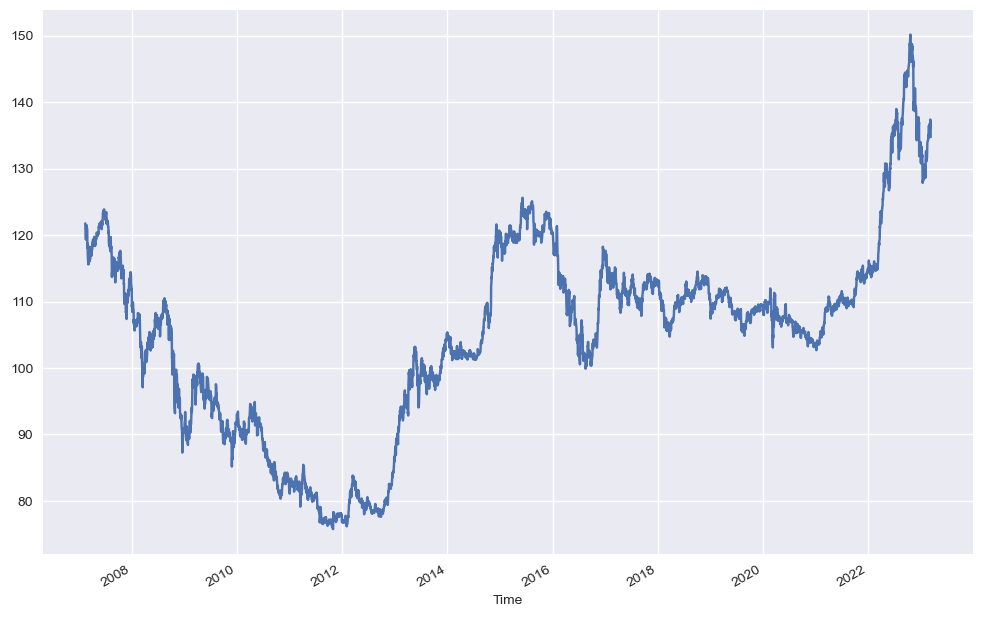

In [123]:
data_2['Close'].plot(figsize=(12, 8))

In [109]:
data_1['JPY'] = data_2['Close']

In [118]:
data_1

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604
2007-01-02,635.791,640.802,635.286,639.143,1282
2007-01-03,639.029,644.663,624.634,626.602,1302
2007-01-04,626.699,630.352,619.600,622.533,1365
2007-01-05,622.268,625.768,601.591,606.841,1284
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


In [119]:
data_2

,Open,High,Low,Close,Volume
Time,,,,,
2007-02-12,121.900,121.953,121.730,121.764,64849
2007-02-13,121.760,121.766,121.090,121.263,618320
2007-02-14,121.272,121.347,120.226,120.286,616539
2007-02-15,120.282,120.359,119.147,119.376,617115
2007-02-16,119.370,119.550,118.984,119.392,586044
...,...,...,...,...,...
2023-03-06,136.016,136.190,135.364,135.995,506836
2023-03-07,135.995,137.438,135.537,137.387,595894
2023-03-08,137.392,137.910,136.477,137.223,528313


In [120]:
data_1 = data_1.loc['2007-02-12':'2023']

In [121]:
data_1

,Open,High,Low,Close,Volume
Time,,,,,
2007-02-12,666.520,666.898,659.061,660.524,1329
2007-02-13,660.511,668.870,659.846,663.033,1353
2007-02-14,663.468,671.708,663.013,668.469,1333
2007-02-15,668.441,670.400,661.906,667.930,1332
2007-02-16,668.023,669.348,662.058,668.094,1187
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


In [91]:
# Define path where data file is saved in your system
# path = '../data/'

data_1['ratio'] = data_1['Close'] / data_1['JPY']


C:\Users\Win10\AppData\Local\Temp\ipykernel_22224\2497505504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['ratio'] = data_1['Close'] / data_1['JPY']


In [92]:
data_1

,Open,High,Low,Close,Volume,JPY,ratio
Time,,,,,,,
2007-02-12,666.520,666.898,659.061,660.524,1329,121.764,5.424625
2007-02-13,660.511,668.870,659.846,663.033,1353,121.263,5.467727
2007-02-14,663.468,671.708,663.013,668.469,1333,120.286,5.557330
2007-02-15,668.441,670.400,661.906,667.930,1332,119.376,5.595178
2007-02-16,668.023,669.348,662.058,668.094,1187,119.392,5.595802
...,...,...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380,135.995,13.575904
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380,137.387,13.202596
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379,137.223,13.227921


In [93]:
ratio = data_1['Close'] / data_1['JPY']

In [94]:
ratio.values

array([ 5.42462468,  5.46772717,  5.55733003, ..., 13.22792098,
       13.43024236, 13.83498345])

Text(0, 0.5, 'Value')

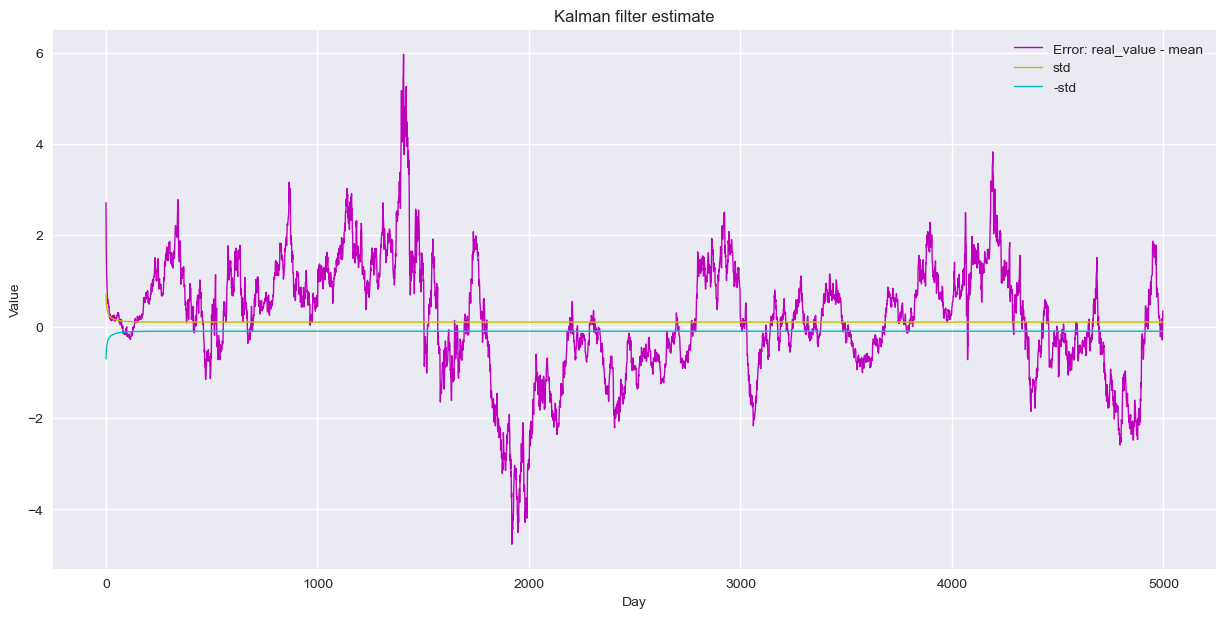

In [95]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=.0001)

mean, cov = kf.filter(ratio.values)
mean, std = mean.squeeze(), np.std(cov.squeeze())

plt.figure(figsize=(15, 7))
plt.plot(ratio.values - mean, 'm', lw=1)
plt.plot(np.sqrt(cov.squeeze()), 'y', lw=1)
plt.plot(-np.sqrt(cov.squeeze()), 'c', lw=1)
plt.title('Kalman filter estimate')
plt.legend(['Error: real_value - mean', 'std', '-std'])
plt.xlabel('Day')
plt.ylabel('Value')

In [96]:
data = data_1.copy()

In [97]:
mean, cov = kf.filter(ratio.values)
data['mean'] = mean.squeeze()
data['cov'] = cov.squeeze()
data['std'] = np.sqrt(data['cov'])
data = data.dropna()

data['ma'] = data['ratio'].rolling(5).mean()
data['z_score'] = (data['ma'] - data['mean'])/data['std']

# Initialise positions as zero
data['position_1'] = np.nan
data['position_2'] = np.nan

# Generate buy, sell and square off signals as: z<-1 buy, z>1 sell and -1<z<1 liquidate the position
for i in range(data.shape[0]):
  if data['z_score'].iloc[i] < -1:
    data['position_1'].iloc[i] = 1
    data['position_2'].iloc[i] = -round(data['ratio'].iloc[i], 0)
  if data['z_score'].iloc[i] > 1:
    data['position_1'].iloc[i] = -1
    data['position_2'].iloc[i] = round(data['ratio'].iloc[i], 0)
  if (abs(data['z_score'].iloc[i]) < 1) & (abs(data['z_score'].iloc[i]) > 0):
    data['position_1'].iloc[i] = 0
    data['position_2'].iloc[i] = 0

# Calculate returns
data['returns'] = ((data['Close']-data['Close'].shift(1))/data['Close'].shift(1))*data['position_1'].shift(1) + \
    ((data['JPY']-data['JPY'].shift(1)) /
     data['JPY'].shift(1))*data['position_2'].shift(1)
data['returns'].sum()

C:\Users\Win10\AppData\Local\Temp\ipykernel_22224\205931039.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position_1'].iloc[i] = -1
C:\Users\Win10\AppData\Local\Temp\ipykernel_22224\205931039.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position_2'].iloc[i] = round(data['ratio'].iloc[i], 0)
C:\Users\Win10\AppData\Local\Temp\ipykernel_22224\205931039.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['p

-5.1896169551496545